# 주택도시보증공사_전국 신규 민간아파트 분양가격 동향

# contents - 분양 가격 예측
* 데이터 전처리
> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [3]:
df_house = pd.read_csv("주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210315.csv",encoding='cp949')
df_house.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
df_house.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
5605,제주,모든면적,2021,3,7199
5606,제주,전용면적 60㎡이하,2021,3,4686
5607,제주,전용면적 60㎡초과 85㎡이하,2021,3,7180
5608,제주,전용면적 85㎡초과 102㎡이하,2021,3,NaN
5609,제주,전용면적 102㎡초과,2021,3,7727


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5610 non-null   object
 1   규모구분     5610 non-null   object
 2   연도       5610 non-null   int64 
 3   월        5610 non-null   int64 
 4   분양가격(㎡)  5170 non-null   object
dtypes: int64(2), object(3)
memory usage: 219.3+ KB


#### 널값 확인

In [6]:
df_house.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    440
dtype: int64

<AxesSubplot:>

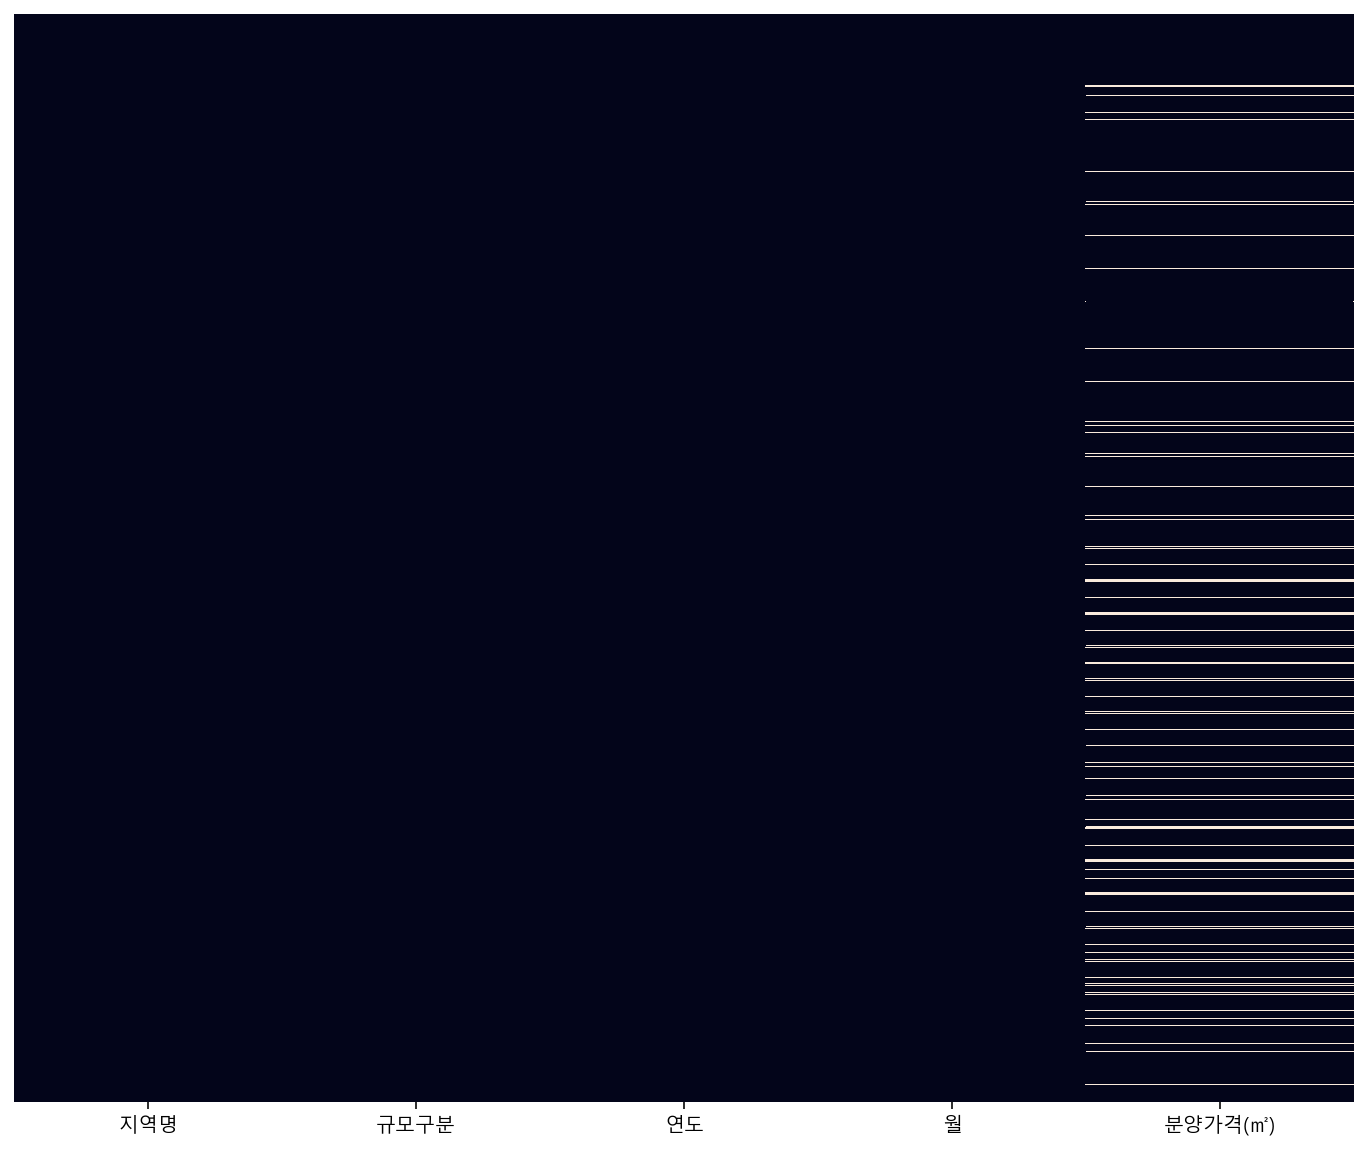

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df_house.isnull(),yticklabels=False,cbar=False)

#### 컬럼 내용 확인

In [8]:
cols = df_house.columns
for i in cols:
    print(i,':\n')
    print(df_house[i].value_counts(),'\n')

지역명 :

경기    330
인천    330
부산    330
충북    330
강원    330
서울    330
전북    330
충남    330
세종    330
경남    330
광주    330
제주    330
울산    330
대구    330
대전    330
경북    330
전남    330
Name: 지역명, dtype: int64 

규모구분 :

전용면적 85㎡초과 102㎡이하    1122
전용면적 60㎡이하           1122
전용면적 102㎡초과          1122
모든면적                 1122
전용면적 60㎡초과 85㎡이하     1122
Name: 규모구분, dtype: int64 

연도 :

2019    1020
2018    1020
2017    1020
2020    1020
2016    1020
2015     255
2021     255
Name: 연도, dtype: int64 

월 :

11    510
3     510
10    510
2     510
1     510
12    510
7     425
6     425
9     425
5     425
8     425
4     425
Name: 월, dtype: int64 

분양가격(㎡) :

3395    18
2221    17
2667    17
2743    16
        16
        ..
4662     1
4578     1
4439     1
4422     1
2501     1
Name: 분양가격(㎡), Length: 2114, dtype: int64 



## 데이터 전처리

#### 위에서 연도값의 2015년 2021년이 상대적으로 작은 것 확인가능 전처리해줌

In [10]:
df_house = df_house[df_house['연도'] != 2015].copy()
df_house['연도'].value_counts()

2019    1020
2018    1020
2017    1020
2020    1020
2016    1020
2021     255
Name: 연도, dtype: int64

#### 분양가격 평당 분양가격으로 변경해줌

In [ ]:
#### pd.to_numeric 을 통해 데이터의 타입을 변경
df_house['분양가격'] = pd.to_numeric(df_house['분양가격(㎡)'], errors='coerce')
df_house.head()

In [ ]:
#### 분양가격 평당 분양가격으로 변경해줌
df_house['평당분양가격'] = df_house['분양가격'] * 3.3

In [ ]:
df_house['평당분양가격']

In [ ]:
df_house.info()

#### 이제 규모구분 컬럼내용 변경필요

In [ ]:
df_house['규모구분'].value_counts()

In [ ]:
df_house['전용면적'] = df_house['규모구분'].str.replace('전용면적',"")
df_house['전용면적'] = df_house['전용면적'].str.replace('초과','~')
df_house['전용면적'] = df_house['전용면적'].str.replace('이하','')
df_house['전용면적'] = df_house['전용면적'].str.replace(' ','').str.strip()
df_house['전용면적']

In [ ]:
df_house.head()

#### 필요없는 컬럼 제거

In [ ]:
df_house = df_house.drop(['규모구분','분양가격(㎡)'],axis=1)
df_house

In [ ]:
df_house.info()

In [ ]:
df_house.groupby(['전용면적','지역명'])['분양가격'].mean()

In [ ]:
korea = df_house['지역명'].unique()
korea

In [ ]:
for i in korea:
    j = df_house[df_house['지역명'] == i].copy()
    print(i,' 지역 널 갯수는 :', end=' ')
    print(j['분양가격'].isnull().sum(),'\n')

#### 위에서 널값이 20개 이하인 지역만 가져와서 전처리 할예정 집값의 기준을 마음대로 설정할수 없어 널값 최대한 줄이기 위함

In [ ]:
for i in korea:
    j = df_house[df_house['지역명'] == i].copy()
    if j['분양가격'].isnull().sum() <= 20:
        print(i,' 지역 널 갯수는 :', end=' ')
        print(j['분양가격'].isnull().sum(),'\n')

In [ ]:
df_house_dosi = df_house.loc[(df_house['지역명'] == '서울') | (df_house['지역명'] == '인천') |
                             (df_house['지역명'] == '경기') | (df_house['지역명'] == '부산') |
                             (df_house['지역명'] == '대구') | (df_house['지역명'] == '강원') |
                             (df_house['지역명'] == '충북') | (df_house['지역명'] == '전북') |
                             (df_house['지역명'] == '전남') | (df_house['지역명'] == '경남') ].copy()

In [ ]:
df_house_dosi.isnull().sum()

In [ ]:
df_house_dosi.index

In [ ]:
df_house_dosi.head()

#### 분양가격은 평당분양가격으로 처리해줘서 필요없음

In [ ]:
df_house_dosi = df_house_dosi.drop('분양가격',axis = 1).copy()

In [ ]:
df_house_dosi

#### 모든 면적값은 어짜피 다른 전용면적에서 다 처리해줘서 필요없다고 판단하여 제거

In [ ]:
df_house_dosi = df_house_dosi[df_house_dosi['전용면적'] != '모든면적'].copy()
df_house_dosi

#### 지역별로 나누어서 평당분양가격 전처리 할 예정

null 값 처리를 위한 함수를 만들자

#### 서울

In [ ]:
df_house_seoul = df_house_dosi[df_house_dosi['지역명'] == '서울'].copy()
df_house_seoul.head()

In [ ]:
df_house_seoul = df_house_seoul.reset_index()
df_house_seoul

In [ ]:
df_house_seoul = df_house_seoul.reset_index()
df_house_seoul

In [ ]:
df_house_seoul = df_house_seoul.drop('index',axis = 1).copy()

In [ ]:
df_house_seoul.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_seoul

In [ ]:
df_house_seoul[df_house_seoul['평당분양가격'].isnull()].index

In [ ]:
# df_house_seoul[df_house_seoul['index'] == 0]['평당분양가격']
df_house_seoul[df_house_seoul['index'] == 0]

In [ ]:
df_house_seoul['평당분양가격'][0] - df_house_seoul['평당분양가격'][4]

#### 만약에 1월 값이 null이면 1월은 = 2월 - (3월 - 2월) 이렇게 판단한 이유는 상승값 빼면 된다 판단

In [ ]:
# for i in df_house_seoul[df_house_seoul['평당분양가격'].isnull()].index:
    df_house_seoul['평당분양가격'][i] = df_house_seoul['평당분양가격'][i+4] - (df_house_seoul['평당분양가격'][i+8] - df_house_seoul['평당분양가격'][i+4])

In [ ]:
df_house_seoul.isnull().sum()

#### 인천

In [ ]:
df_house_incheon = df_house_dosi[df_house_dosi['지역명'] == '인천'].copy()
df_house_incheon.head()

In [ ]:
df_house_incheon = df_house_incheon.reset_index().reset_index()
df_house_incheon

In [ ]:
df_house_incheon = df_house_incheon.drop('index',axis = 1).copy()

In [ ]:
df_house_incheon.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_incheon

In [ ]:
df_house_incheon[df_house_incheon['평당분양가격'].isnull()]

#### null 값이 2017년은 11월달에 만 없으므로 똑같이 1월 값이 null이면 1월은 = 2월 - (3월 - 2월) 이렇게 판단한 이유는 상승값 빼면 된다 판단
#### 2018년은 전용면적이 똑같은 것이 없음 그래서 그 이후 값을 들고 오면 에러가남
#### 그래서 2018년은 역으로 1월이면 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_incheon[df_house_incheon['평당분양가격'].isnull()].index:
    if df_house_incheon['연도'][i] == 2017:
        df_house_incheon['평당분양가격'][i] = df_house_incheon['평당분양가격'][i+4] - (df_house_incheon['평당분양가격'][i+8] - df_house_incheon['평당분양가격'][i+4])
    
    if df_house_incheon['연도'][i] == 2018:
        df_house_incheon['평당분양가격'][i] = df_house_incheon['평당분양가격'][i-4] + (df_house_incheon['평당분양가격'][i-4] - df_house_incheon['평당분양가격'][i-8])

In [ ]:
df_house_incheon[df_house_incheon['평당분양가격'].isnull()]

#### 경기

In [ ]:
df_house_gyeonggi = df_house_dosi[df_house_dosi['지역명'] == '경기'].copy()
df_house_gyeonggi.head()

In [ ]:
df_house_gyeonggi = df_house_gyeonggi.reset_index().reset_index()
df_house_gyeonggi

In [ ]:
df_house_gyeonggi = df_house_gyeonggi.drop('index',axis = 1).copy()

In [ ]:
df_house_gyeonggi.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_gyeonggi

In [ ]:
df_house_gyeonggi[df_house_gyeonggi['평당분양가격'].isnull()]

#### 만약에 1월 값이 null이면 1월은 = 2월 - (3월 - 2월) 이렇게 판단한 이유는 상승값 빼면 된다 판단

In [ ]:
for i in df_house_gyeonggi[df_house_gyeonggi['평당분양가격'].isnull()].index:
    df_house_gyeonggi['평당분양가격'][i] = df_house_gyeonggi['평당분양가격'][i+4] - (df_house_gyeonggi['평당분양가격'][i+8] - df_house_gyeonggi['평당분양가격'][i+4])
    

In [ ]:
df_house_gyeonggi[df_house_gyeonggi['평당분양가격'].isnull()]

#### 부산

In [ ]:
df_house_busan = df_house_dosi[df_house_dosi['지역명'] == '부산'].copy()
df_house_busan.head()

In [ ]:
df_house_busan = df_house_busan.reset_index().reset_index()
df_house_busan

In [ ]:
df_house_busan = df_house_busan.drop('index',axis = 1).copy()

In [ ]:
df_house_busan.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_busan.head()

In [ ]:
df_house_busan[df_house_busan['평당분양가격'].isnull()]

#### 만약에 1월 값이 null이면 1월은 = 2월 - (3월 - 2월) 이렇게 판단한 이유는 상승값 빼면 된다 판단

In [ ]:
for i in df_house_busan[df_house_busan['평당분양가격'].isnull()].index:
    df_house_busan['평당분양가격'][i] = df_house_busan['평당분양가격'][i+4] - (df_house_busan['평당분양가격'][i+8] - df_house_busan['평당분양가격'][i+4])
    

In [ ]:
df_house_busan[df_house_busan['평당분양가격'].isnull()]

#### 대구

In [ ]:
df_house_daegu = df_house_dosi[df_house_dosi['지역명'] == '대구'].copy()
df_house_daegu.head()

In [ ]:
df_house_daegu = df_house_daegu.reset_index().reset_index()
df_house_daegu

In [ ]:
df_house_daegu = df_house_daegu.drop('index',axis = 1).copy()

In [ ]:
df_house_daegu.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_daegu.head()

In [ ]:
df_house_daegu[df_house_daegu['평당분양가격'].isnull()]

#### null 값이 2017년은 11월달에 만 없으므로 똑같이 1월 값이 null이면 1월은 = 2월 - (3월 - 2월) 이렇게 판단한 이유는 상승값 빼면 된다 판단
#### 2017년은 전용면적이 10월 전에는 똑같은 것이 없음 그래서 그 이후 값을 들고 오면 에러가남
#### 그래서 2017년 10월 전 꺼는 역으로 1월이면 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_daegu[df_house_daegu['평당분양가격'].isnull()].index:
    if df_house_daegu['연도'][i] == 2017 and df_house_daegu['월'][i] <= 10:
        df_house_daegu['평당분양가격'][i] = df_house_daegu['평당분양가격'][i-4] + (df_house_daegu['평당분양가격'][i-4] - df_house_daegu['평당분양가격'][i-8])

In [ ]:
df_house_daegu[df_house_daegu['평당분양가격'].isnull()]

#### 나머지 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_daegu[df_house_daegu['평당분양가격'].isnull()].index:
    df_house_daegu['평당분양가격'][i] = df_house_daegu['평당분양가격'][i-4] + (df_house_daegu['평당분양가격'][i-4] - df_house_daegu['평당분양가격'][i-8])

In [ ]:
df_house_daegu[df_house_daegu['평당분양가격'].isnull()]

#### 강원

In [ ]:
df_house_gangwon = df_house_dosi[df_house_dosi['지역명'] == '강원'].copy()
df_house_gangwon.head()

In [ ]:
df_house_gangwon = df_house_gangwon.reset_index().reset_index()
df_house_gangwon

In [ ]:
df_house_gangwon = df_house_gangwon.drop('index',axis = 1).copy()

In [ ]:
df_house_gangwon.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_gangwon.head()

In [ ]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

#### 2016년 1월이 시작이라 2월 부터 9월 까지의 같은면적 null값은 비교대상을 다른 면적들의 상승값 평균을 더했다 

In [ ]:
for i in df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()].index:
    if df_house_gangwon['연도'][i] == 2016 and df_house_gangwon['월'][i] <= 9:
        df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4] + np.mean(((df_house_gangwon['평당분양가격'][i+5] - df_house_gangwon['평당분양가격'][i+1]),
                                                                                 (df_house_gangwon['평당분양가격'][i+5-2] - df_house_gangwon['평당분양가격'][i+1-2]),
                                                                                 (df_house_gangwon['평당분양가격'][i+5-3] - df_house_gangwon['평당분양가격'][i+1-3])))

In [ ]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

#### 나머지 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()].index:
    df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4] + (df_house_gangwon['평당분양가격'][i-4] - df_house_gangwon['평당분양가격'][i-8])

In [ ]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

#### 충북

In [ ]:
df_house_chungbuk = df_house_dosi[df_house_dosi['지역명'] == '충북'].copy()
df_house_chungbuk.head()

In [ ]:
df_house_chungbuk = df_house_chungbuk.reset_index().reset_index()
df_house_chungbuk

In [ ]:
df_house_chungbuk = df_house_chungbuk.drop('index',axis = 1).copy()

In [ ]:
df_house_chungbuk.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_chungbuk.head()

In [ ]:
df_house_chungbuk[df_house_chungbuk['평당분양가격'].isnull()]

#### 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_chungbuk[df_house_chungbuk['평당분양가격'].isnull()].index:
    df_house_chungbuk['평당분양가격'][i] = df_house_chungbuk['평당분양가격'][i-4] + (df_house_chungbuk['평당분양가격'][i-4] - df_house_chungbuk['평당분양가격'][i-8])

In [ ]:
df_house_chungbuk[df_house_chungbuk['평당분양가격'].isnull()]

#### 전북

In [ ]:
df_house_jeonbuk = df_house_dosi[df_house_dosi['지역명'] == '전북'].copy()
df_house_jeonbuk.head()

In [ ]:
df_house_jeonbuk = df_house_jeonbuk.reset_index().reset_index()
df_house_jeonbuk

In [ ]:
df_house_jeonbuk = df_house_jeonbuk.drop('index',axis = 1).copy()

In [ ]:
df_house_jeonbuk.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_jeonbuk.head()

In [ ]:
df_house_jeonbuk[df_house_jeonbuk['평당분양가격'].isnull()]

#### 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단¶

In [ ]:
for i in df_house_jeonbuk[df_house_jeonbuk['평당분양가격'].isnull()].index:
    df_house_jeonbuk['평당분양가격'][i] = df_house_jeonbuk['평당분양가격'][i-4] + (df_house_jeonbuk['평당분양가격'][i-4] - df_house_jeonbuk['평당분양가격'][i-8])

In [ ]:
df_house_jeonbuk[df_house_jeonbuk['평당분양가격'].isnull()]

#### 전남

In [ ]:
df_house_jeonnam = df_house_dosi[df_house_dosi['지역명'] == '전남'].copy()
df_house_jeonnam.head()

In [ ]:
df_house_jeonnam = df_house_jeonnam.reset_index().reset_index()
df_house_jeonnam

In [ ]:
df_house_jeonnam = df_house_jeonnam.drop('index',axis = 1).copy()

In [ ]:
df_house_jeonnam.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_jeonnam.head()

In [ ]:
df_house_jeonnam[df_house_jeonnam['평당분양가격'].isnull()]

#### 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_jeonnam[df_house_jeonnam['평당분양가격'].isnull()].index:
    df_house_jeonnam['평당분양가격'][i] = df_house_jeonnam['평당분양가격'][i-4] + (df_house_jeonnam['평당분양가격'][i-4] - df_house_jeonnam['평당분양가격'][i-8])

In [ ]:
df_house_jeonnam[df_house_jeonnam['평당분양가격'].isnull()]

#### 경남

In [ ]:
df_house_gyeongnam = df_house_dosi[df_house_dosi['지역명'] == '경남'].copy()
df_house_gyeongnam.head()

In [ ]:
df_house_gyeongnam = df_house_gyeongnam.reset_index().reset_index()
df_house_gyeongnam

In [ ]:
df_house_gyeongnam = df_house_gyeongnam.drop('index',axis = 1).copy()

In [ ]:
df_house_gyeongnam.rename(columns = {'level_0' : 'index'}, inplace = True)

In [ ]:
df_house_gyeongnam.head()

In [ ]:
df_house_gyeongnam[df_house_gyeongnam['평당분양가격'].isnull()]

#### 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [ ]:
for i in df_house_gyeongnam[df_house_gyeongnam['평당분양가격'].isnull()].index:
    df_house_gyeongnam['평당분양가격'][i] = df_house_gyeongnam['평당분양가격'][i-4] + (df_house_gyeongnam['평당분양가격'][i-4] - df_house_gyeongnam['평당분양가격'][i-8])

In [ ]:
df_house_gyeongnam[df_house_gyeongnam['평당분양가격'].isnull()]

In [ ]:
df_house_gu = pd.concat([df_house_seoul, df_house_gyeonggi, df_house_busan, df_house_daegu,
                        df_house_gangwon, df_house_chungbuk, df_house_jeonbuk, df_house_jeonnam,
                        df_house_gyeongnam], axis = 0)

In [ ]:
df_house_gu.head()

In [ ]:
df_house_gu.isnull().sum()

#### 전처리한 파일 엑셀로 저장

In [ ]:
# df_house_gu.to_csv('house.csv', index=False, encoding='cp949')

In [ ]:
df_house_dosi = pd.read_csv("house.csv",encoding='cp949')
df_house_dosi

In [ ]:
df_house_dosi = df_house_dosi.drop('index',axis = 1).copy()

In [ ]:
df_house_dosi.head()

In [ ]:
df_house_dosi.isnull().sum()

#### 지도에서 보기위한 경도 위도 처리

In [ ]:
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('서울'),'경도'] = 126.97833527595007

#### 처리된거 확인

In [ ]:
df_house_dosi[df_house_dosi['지역명']=='서울'].head()

In [ ]:
df_house_dosi['지역명'].unique()

In [ ]:
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('서울'),'위도'] = 37.56666950126609

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('경기'),'위도'] = 37.274906479858764
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('경기'),'경도'] = 127.00921653805827

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('부산'),'위도'] = 35.17974743433661
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('부산'),'경도'] = 129.07502991248603

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('대구'),'위도'] = 35.87138392116897
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('대구'),'경도'] = 128.60176122335534

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('강원'),'위도'] = 37.88533303351936
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('강원'),'경도'] = 127.7298086355599

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('충북'),'위도'] = 36.635633006337365
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('충북'),'경도'] = 127.49137384332671

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('전북'),'위도'] = 35.82029494433091
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('전북'),'경도'] = 127.10878586567907

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('전남'),'위도'] = 34.81611288144505
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('전남'),'경도'] = 126.46292419713417

df_house_dosi.loc[df_house_dosi['지역명'].str.contains('경남'),'위도'] = 35.23826300945596 
df_house_dosi.loc[df_house_dosi['지역명'].str.contains('경남'),'경도'] = 128.6924318378324

In [ ]:
#### 제대로 처리됬는지 확인

In [ ]:
df_house_dosi['위도'].unique()

In [ ]:
df_house_dosi_lat = df_house_dosi[(df_house_dosi['전용면적']=='102㎡~') & (df_house_dosi['연도'] == 2020) & (df_house_dosi['월'] == 12)]
df_house_dosi_lat

In [ ]:
lat = df_house_dosi_lat['위도'].mean() # 초기 위도 초기화
long = df_house_dosi_lat['경도'].mean() # 초기 경도 초기화

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:

m = folium.Map([lat,long],zoom_start=7) # 처음 화면 보일때 시작점과 크기,

for i in df_house_dosi_lat.index:
    sub_lat = df_house_dosi_lat.loc[i,'위도']
    sub_long = df_house_dosi_lat.loc[i,'경도']
    tooltip = df_house_dosi_lat.loc[i,'지역명'] + ' : ' + str(df_house_dosi_lat.loc[i,'평당분양가격']) + "천원" # 마우스 올릴떄 이벤트
    
    color = 'green'
    
    radius = df_house_dosi_lat.loc[i,'평당분양가격']/1000
    
    # fill = True 바꿔보며 실습
    folium.CircleMarker([sub_lat,sub_long],tooltip=tooltip,color=color,radius=radius, fill = True).add_to(m)

# m.save('index.html')
m